In [1]:
import numpy as np
import numpy.random as npr

from scipy.integrate import odeint

import matplotlib.pyplot as plt
from matplotlib import rcParams


from scipy.fftpack import fft, fftfreq, fftshift
from scipy import integrate
from scipy.optimize import curve_fit

import pandas as pd

from scipy.signal import find_peaks

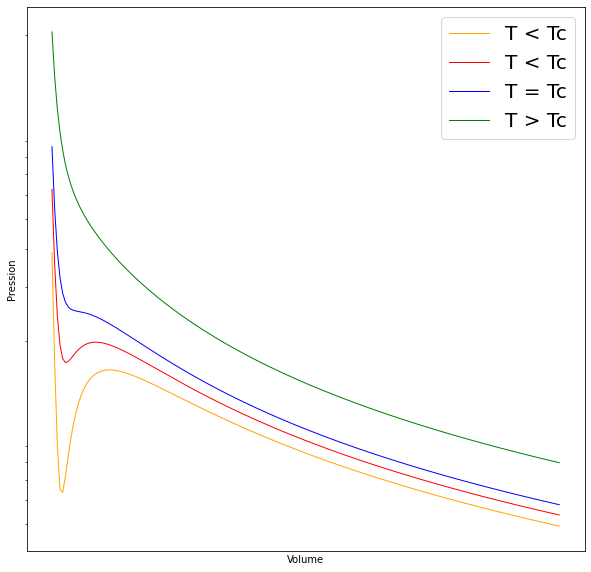

In [2]:
###Paramètres
n = 1.0
R = 8.314
a = 2700
b = 0.65

def P(V, T) : 
    return n*R*T/(V-n*b) - a*n**2/V**2

V = np.arange (1, 20, 1e-1)



plt.figure(9,figsize=(10, 10))
plt.plot(V, P(V, 130), 'orange', label='T < Tc', linewidth = 1)
plt.plot(V, P(V, 140), 'red', linewidth = 1, label='T < Tc')
plt.plot(V, P(V, 150), 'blue', linewidth = 1, label='T = Tc')
plt.plot(V, P(V, 200), 'green', linewidth = 1, label='T > Tc')
plt.xlabel('Volume')
plt.ylabel('Pression')
plt.yscale('log')
plt.xticks([])
plt.yticks([])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

In [15]:
###Mesure chaleur latente de vaporisation de l'azote 

#Données

U = 15.7
dU = 0.1

I = 2.96
dI = 0.01

R = 5.0
dR = 0.1

m0 = np.array([5.5, 5.2, 4.9, 4.7])
m0 = m0 - m0[0]
mC = np.array([31.3, 25.6, 21.0, 16.3])
mC = mC - mC[0]
dm = 0.2

t = np.array([0, 20, 40, 60])
dt = 0.5

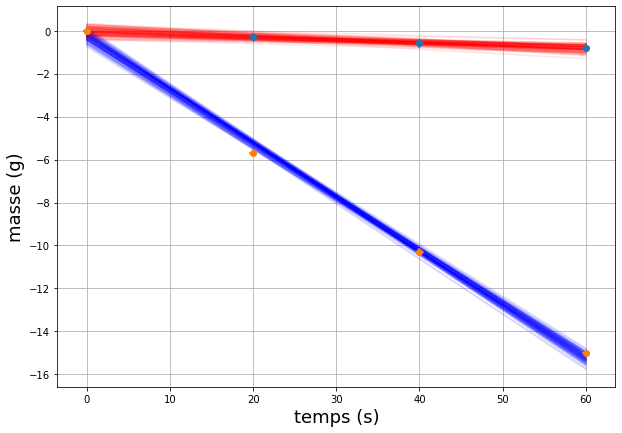

In [16]:
#Monte-Carlo de la variation de masse

def f_lin(x,a,b):
    return a*x+b

N_mc = 100 # nombre de simulations
param0 = np.zeros((2, N_mc))
paramC = np.zeros((2, N_mc))



for i in range(N_mc):
    
    m0_mc = np.array([])
    mC_mc = np.array([])
    t_mc = np.array([])
    
    for k in range (len(m0)) :
        m0_mc = np.append(m0_mc, npr.normal(loc=m0[k], scale=dm))
        mC_mc = np.append(mC_mc, npr.normal(loc=mC[k], scale=dm))
        t_mc = np.append(t_mc, npr.normal(loc=t[k], scale=dt))
            
    pop0, covop0 = curve_fit(f_lin, t_mc, m0_mc)
    param0[0,i] = pop0[0]
    param0[1,i] = pop0[1]

    popC, covopC = curve_fit(f_lin, t_mc, mC_mc)
    paramC[0,i] = popC[0]
    paramC[1,i] = popC[1]
    
y0_th = f_lin(t, *pop0)
yC_th = f_lin(t, *popC)

plt.figure(5, figsize=(10,7))
for i in range(N_mc):
    y0_th = f_lin(t, *param0[:,i])
    plt.plot(t, y0_th,'r', alpha=0.1)
    yC_th = f_lin(t, *paramC[:,i])
    plt.plot(t, yC_th,'b', alpha=0.1)
plt.errorbar(t, m0, xerr=dt, yerr=dm, fmt='o')
plt.errorbar(t, mC, xerr=dt, yerr=dm, fmt='o')
plt.grid(which='both')
plt.xlabel('temps (s)', fontsize=18)
plt.ylabel('masse (g)', fontsize=18)
plt.show()    



In [17]:
#Calcul de la chaleur latente

a0_moy = np.mean(param0[0,:])
a0_sig = np.std(param0[0,:])

aC_moy = np.mean(paramC[0,:])
aC_sig = np.std(paramC[0,:])

print (a0_moy, '+-',a0_sig )
print (aC_moy, '+-',aC_sig )

-0.013077102603056341 +- 0.004445054122554332
-0.24929882177742793 +- 0.005538222192285011


In [19]:


print (a0_moy-aC_moy)





0.2362217191743716
